In [1]:
from faker import Faker

fake = Faker()

faker_messages = []

for _ in range(1000):
    faker_messages.append(fake.text())

print(faker_messages[1])

Drug become Republican six mean manage minute. The this rich grow why network thing.
Speak none relate population itself meet.


In [2]:
file_path = 'sentiment labelled sentences/imdb_labelled.txt'

# Открываем файл, разделяем строки и читаем текст до '/t'
with open(file_path, 'r', encoding='utf-8') as file:
    Text = [line.split('\t')[0] for line in file.readlines()]
    

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

tokenized_Text = [word_tokenize(message) for message in Text]
tokenized_Faker = [word_tokenize(message) for message in faker_messages]


In [4]:
all_tokens = []
for message in tokenized_Text:
    all_tokens.extend(message)

for message in tokenized_Faker:
    all_tokens.extend(message)

# Получаем сэт всех токенов
all_tokens_set = set(all_tokens)

In [5]:
word_to_id = {word: idx for idx, word in enumerate(all_tokens_set)}

In [6]:
numeric_ids = [word_to_id[word] for word in all_tokens_set] 
#print(numeric_ids)

idc_Text = [[word_to_id[word] for word in tokens] for tokens in tokenized_Text]
idc_Faker = [[word_to_id[word] for word in tokens] for tokens in tokenized_Faker]

In [7]:
# Длины массивов
lengths_Text = [len(arr) for arr in idc_Text]
lengths_Faker = [len(arr) for arr in idc_Faker]

# Средняя длина массивов
average_length_Text = sum(lengths_Text) / len(lengths_Text)
average_length_Faker = sum(lengths_Faker) / len(lengths_Faker)

# Максимальная длина каждого массива
max_length_Text = max(lengths_Text)
max_length_Faker = max(lengths_Faker)

# Вывод результатов
print("Количество предложений для Text:", len(idc_Text))
print("Средняя длина массивов для Text:", average_length_Text)
print("Максимальная длина массива для Text:", max_length_Text)

print("\n")

print("Количество предложений для Faker:", len(idc_Faker))
print("Средняя длина массивов для Faker:", average_length_Faker)
print("Максимальная длина массива для Faker:", max_length_Faker)

Количество предложений для Text: 1000
Средняя длина массивов для Text: 16.653
Максимальная длина массива для Text: 80


Количество предложений для Faker: 1000
Средняя длина массивов для Faker: 26.245
Максимальная длина массива для Faker: 40


In [8]:
def split_arrays(array, max_length):
    new_arrays = []
    for sub_array in array:
        if len(sub_array) > max_length:
            new_arrays.append(sub_array[:max_length])
            new_arrays.append(sub_array[max_length:])
        else:
            new_arrays.append(sub_array)
    return new_arrays

# Разделение массивов длинной больше 41
max_length_threshold = 40
idc_Text = split_arrays(idc_Text, max_length_threshold)
idc_Faker = split_arrays(idc_Faker, max_length_threshold)


In [9]:
# Длины массивов
lengths_Text = [len(arr) for arr in idc_Text]
lengths_Faker = [len(arr) for arr in idc_Faker]

# Средняя длина массивов
average_length_Text = sum(lengths_Text) / len(lengths_Text)
average_length_Faker = sum(lengths_Faker) / len(lengths_Faker)

# Максимальная длина каждого массива
max_length_Text = max(lengths_Text)
max_length_Faker = max(lengths_Faker)

# Вывод результатов
print("Количество предложений для Text:", len(idc_Text))
print("Средняя длина массивов для Text:", average_length_Text)
print("Максимальная длина массива для Text:", max_length_Text)

print("\n")

print("Количество предложений для Faker:", len(idc_Faker))
print("Средняя длина массивов для Faker:", average_length_Faker)
print("Максимальная длина массива для Faker:", max_length_Faker)

Количество предложений для Text: 1036
Средняя длина массивов для Text: 16.074324324324323
Максимальная длина массива для Text: 40


Количество предложений для Faker: 1000
Средняя длина массивов для Faker: 26.245
Максимальная длина массива для Faker: 40


In [10]:
id_to_word = {v: k for k, v in word_to_id.items()}


fill_value = len(id_to_word) # Значение для заполнения
desired_length = 40  # Желаемая длина

# Функция для заполнения массивов
def fill_array(array, fill_value, desired_length):
    for sub_array in array:
        if len(sub_array) < desired_length:
            while len(sub_array) < desired_length:
                sub_array.append(fill_value)
    return array

# Доработка массивов
completed_idc_Text = fill_array(idc_Text, fill_value, desired_length)
completed_idc_Faker = fill_array(idc_Faker, fill_value, desired_length)


In [11]:
print(completed_idc_Text[2])

[2331, 311, 1153, 4481, 3110, 831, 1607, 239, 229, 785, 4096, 1513, 3391, 3768, 554, 3862, 867, 1859, 4517, 554, 1356, 1513, 3822, 3701, 4040, 1607, 1513, 2781, 1607, 4115, 2665, 395, 1437, 4604, 4604, 4604, 4604, 4604, 4604, 4604]


In [12]:
def decode_tokens(array, id_to_word):
    decoded_sentences = []
    for sub_array in array:
        decoded_sentence = ' '.join([id_to_word[idx] for idx in sub_array])
        decoded_sentences.append(decoded_sentence)
    return decoded_sentences

# Создание обратного словаря id_to_word
id_to_word = {v: k for k, v in word_to_id.items()}
id_to_word[fill_value] = 'pepe'

# Обратная расшифровка completed_idc_Text
decoded_sentences_Text = decode_tokens(completed_idc_Text, id_to_word)

# Вывод результатов
print(decoded_sentences_Text[4])

The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head . pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe pepe


In [13]:
import numpy as np

# Перевод в NumPy
numpy_Text = np.array(completed_idc_Text)
numpy_Faker = np.array(completed_idc_Faker)

combined_data = np.concatenate((numpy_Text, numpy_Faker), axis=0)


array_ones = np.ones(len(numpy_Text))
array_zeros = np.zeros(len(numpy_Faker))

# Объединение массивов
combined_array = np.concatenate((array_ones, array_zeros), axis=0)

print(combined_data.shape)
print(combined_array.shape)

(2036, 40)
(2036,)


In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten

input_shape = combined_data.shape[1]

# Создание модели
model = Sequential()

# Добавление слоев
model.add(LSTM(360, input_shape=(input_shape, 1)))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 360)               521280    
                                                                 
 dense (Dense)               (None, 1)                 361       
                                                                 
Total params: 521641 (1.99 MB)
Trainable params: 521641 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
import matplotlib.pyplot as plt
# Обучение модели
history = model.fit(combined_data, combined_array, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
51/51 [==============================] - 9s 138ms/step - loss: 0.6349 - accuracy: 0.6308 - val_loss: 0.9698 - val_accuracy: 0.0368
Epoch 2/150
51/51 [==============================] - 6s 126ms/step - loss: 0.5879 - accuracy: 0.6726 - val_loss: 1.0918 - val_accuracy: 0.0049
Epoch 3/150
51/51 [==============================] - 7s 128ms/step - loss: 0.5751 - accuracy: 0.6609 - val_loss: 1.2451 - val_accuracy: 0.0074
Epoch 4/150
51/51 [==============================] - 7s 132ms/step - loss: 0.5775 - accuracy: 0.6898 - val_loss: 0.7851 - val_accuracy: 0.5294
Epoch 5/150
51/51 [==============================] - 7s 135ms/step - loss: 0.5660 - accuracy: 0.7052 - val_loss: 1.0049 - val_accuracy: 0.1642
Epoch 6/150
51/51 [==============================] - 7s 134ms/step - loss: 0.5673 - accuracy: 0.7082 - val_loss: 0.8852 - val_accuracy: 0.3701
Epoch 7/150
51/51 [==============================] - 7s 131ms/step - loss: 0.5644 - accuracy: 0.6996 - val_loss: 0.6996 - val_accuracy: 0.6716

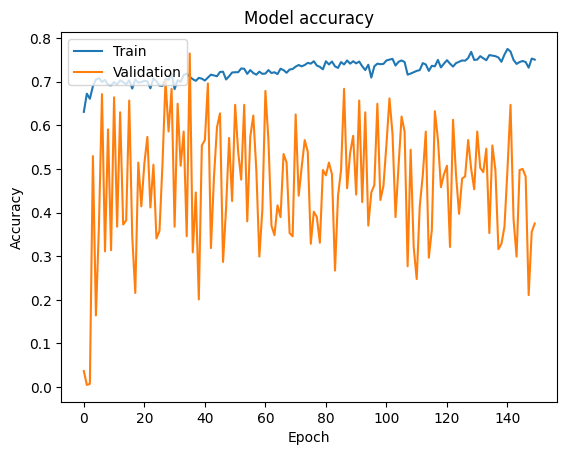

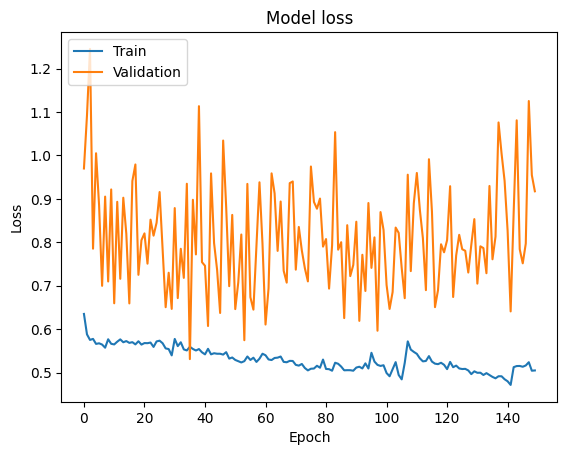

In [16]:
# Построение графика точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Построение графика потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
#  теперь у нас модель с эмбеддинг
model1 = Sequential()

model1.add(Embedding( len(id_to_word), 100, input_length=40))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [18]:
history = model1.fit(combined_data, combined_array, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/150
51/51 [==============================] - 9s 81ms/step - loss: 0.3063 - accuracy: 0.8372 - val_loss: 0.0800 - val_accuracy: 0.9877
Epoch 2/150
51/51 [==============================] - 3s 61ms/step - loss: 0.1051 - accuracy: 0.9810 - val_loss: 0.2882 - val_accuracy: 0.9191
Epoch 3/150
51/51 [==============================] - 3s 59ms/step - loss: 0.0388 - accuracy: 0.9939 - val_loss: 0.0700 - val_accuracy: 0.9828
Epoch 4/150
51/51 [==============================] - 3s 61ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0666 - val_accuracy: 0.9877
Epoch 5/150
51/51 [==============================] - 3s 60ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9877
Epoch 6/150
51/51 [==============================] - 3s 61ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9877
Epoch 7/150
51/51 [==============================] - 3s 61ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9877
Epoch 

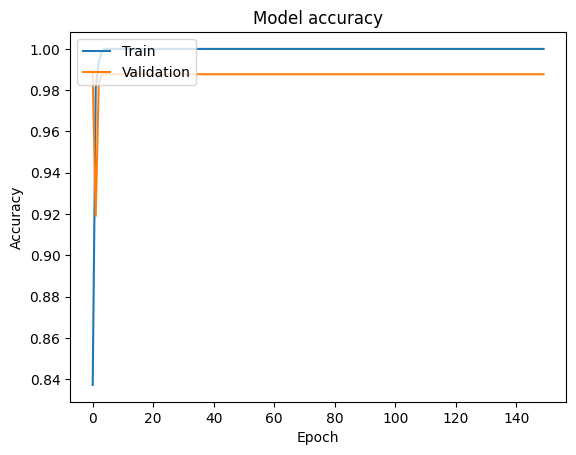

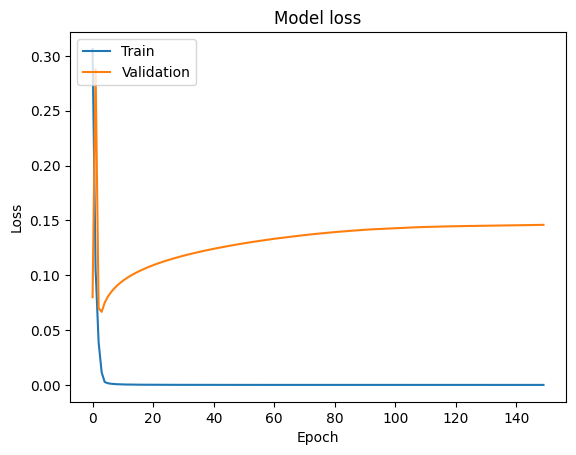

In [19]:
# График точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# График потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

А тут мы попробуем сделать тоже самое, но с использованием библиотеки pytorch

In [37]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

Data_tensor = torch.tensor(combined_data)
Label_tensor = torch.tensor(combined_array)

dataset = TensorDataset(Data_tensor, Label_tensor)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

print(f'Num Train: {len(train_data)}')
print(f'Num Test: {len(test_data)}')

Num Train: 1628
Num Test: 408


In [38]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


In [39]:
embedding_dim = 55  # Размерность плотных векторных представлений
vocab_size = len(id_to_word)  # Размер словаря, который вы используете
embedding_matrix = nn.Parameter(torch.randn(vocab_size, embedding_dim))
print(len(embedding_matrix))

# Получаем векторное представление для вашего токена
def get_vector_for_token(token_index):
    return embedding_matrix[token_index]

class LSTMClassifier(nn.Module):
    def __init__(self, input_size):
        super(LSTMClassifier, self).__init__()
        self.input_size = input_size
        self.lstm = nn.LSTM(input_size, 128)
        self.fc = nn.Linear(128, 1)
        self.softmax = nn.Sigmoid()

    def forward(self, input):
        embedded_text = torch.stack([get_vector_for_token(token) for token in input])
        lstm_out, _ = self.lstm(embedded_text.view(len(input), 1, -1))
        output = self.fc(lstm_out[-1].view(1, -1))
        output = self.softmax(output)
        return output

pepe_model = LSTMClassifier(len(embedding_matrix))

4605


In [40]:
#for data in train_loader:
 #   inputs, targets = data
  #  for i in range(len(inputs)):  ~~~There is some fixing code~~~
   #     input = inputs[i]
    #    input = input.unsqueeze(0)
     #   pred = pepe_model(input)
    #break
       

In [ ]:
from tqdm import tqdm

def calculate_accuracy(batch_preds, targets):
    predicted = batch_preds > 0.5  
    correct = predicted.eq(targets.view_as(predicted)).sum().item()  
    accuracy = correct / targets.size(0)
    return accuracy

loss_values = []
accuracy_values = []

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(pepe_model.parameters(), lr=0.0001)

# Обучение модели
def train_model(model, criterion, optimizer, train_loader, epochs=10):
    for epoch in range(epochs):
        loss_val = 0.0
        acc_val = 0.0
        for data in (pbar :=  tqdm(train_loader)):
            inputs, targets = data
            batch_preds = []  # Создаем пустой список для хранения предсказаний в текущем батче
            for i in range(len(inputs)):
                input = inputs[i]
                input = input.unsqueeze(0)  
                pred = pepe_model(input)
                batch_preds.append(pred)  
        
            batch_preds = torch.cat(batch_preds) 
            targets = targets.unsqueeze(1)  
            
            loss = criterion(batch_preds, targets.float())
            loss_item = loss.item()
            loss_val += loss_item
    
            acc_current = calculate_accuracy(batch_preds,targets)
            acc_val += acc_current
            
            loss.backward() 
            optimizer.step()

            pbar.set_description(f' epoch : {epoch}\t loss: {loss_item:.5f}\t train accuracy: {acc_current:.3f}')
            
        loss_values.append(loss_val/len(train_loader))
        accuracy_values.append(acc_val/len(train_loader))
    
        
        print(f" mid loss : {loss_val/len(train_loader):.5f}")
        print(f" accuracy : {acc_val/len(train_loader):.5f}")

# Пример вызова функции обучения
train_model(pepe_model, criterion, optimizer, train_loader, 30)

 epoch : 0	 loss: 0.14203	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:17<00:00,  5.73it/s]


 mid loss : 0.49331
 accuracy : 0.75368


 epoch : 1	 loss: 0.22339	 train accuracy: 0.917: 100%|██████████████████████████████| 102/102 [00:20<00:00,  4.92it/s]


 mid loss : 0.28940
 accuracy : 0.88031


 epoch : 2	 loss: 0.61823	 train accuracy: 0.750: 100%|██████████████████████████████| 102/102 [00:17<00:00,  5.78it/s]


 mid loss : 0.21773
 accuracy : 0.92708


 epoch : 3	 loss: 0.11024	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.65it/s]


 mid loss : 0.19029
 accuracy : 0.94914


 epoch : 4	 loss: 0.09678	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.62it/s]


 mid loss : 0.13843
 accuracy : 0.96385


 epoch : 5	 loss: 0.04828	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.44it/s]


 mid loss : 0.09946
 accuracy : 0.98468


 epoch : 6	 loss: 0.07762	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.50it/s]


 mid loss : 0.08575
 accuracy : 0.98468


 epoch : 7	 loss: 0.03326	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.47it/s]


 mid loss : 0.07904
 accuracy : 0.98591


 epoch : 8	 loss: 0.12890	 train accuracy: 0.917: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.48it/s]


 mid loss : 0.06923
 accuracy : 0.98509


 epoch : 9	 loss: 0.04431	 train accuracy: 1.000: 100%|██████████████████████████████| 102/102 [00:18<00:00,  5.60it/s]


 mid loss : 0.06417
 accuracy : 0.99265


 epoch : 10	 loss: 0.04024	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:18<00:00,  5.65it/s]


 mid loss : 0.05776
 accuracy : 0.98958


 epoch : 11	 loss: 0.03605	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.68it/s]


 mid loss : 0.04884
 accuracy : 0.99020


 epoch : 12	 loss: 0.02629	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:18<00:00,  5.63it/s]


 mid loss : 0.04251
 accuracy : 0.99326


 epoch : 13	 loss: 0.05420	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:18<00:00,  5.64it/s]


 mid loss : 0.04195
 accuracy : 0.99203


 epoch : 14	 loss: 0.18552	 train accuracy: 0.917: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.69it/s]


 mid loss : 0.04193
 accuracy : 0.99183


 epoch : 15	 loss: 0.02164	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.67it/s]


 mid loss : 0.03850
 accuracy : 0.99510


 epoch : 16	 loss: 0.04585	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:18<00:00,  5.65it/s]


 mid loss : 0.03921
 accuracy : 0.99265


 epoch : 17	 loss: 0.01549	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.68it/s]


 mid loss : 0.03016
 accuracy : 0.99449


 epoch : 18	 loss: 0.04940	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.73it/s]


 mid loss : 0.02724
 accuracy : 0.99632


 epoch : 19	 loss: 0.04074	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.74it/s]


 mid loss : 0.03059
 accuracy : 0.99571


 epoch : 20	 loss: 0.00673	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.72it/s]


 mid loss : 0.02814
 accuracy : 0.99632


 epoch : 21	 loss: 0.01109	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.70it/s]


 mid loss : 0.02622
 accuracy : 0.99571


 epoch : 22	 loss: 0.02298	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.75it/s]


 mid loss : 0.02403
 accuracy : 0.99449


 epoch : 23	 loss: 0.02700	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.70it/s]


 mid loss : 0.02317
 accuracy : 0.99877


 epoch : 24	 loss: 0.03435	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.73it/s]


 mid loss : 0.02452
 accuracy : 0.99755


 epoch : 25	 loss: 0.00649	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.74it/s]


 mid loss : 0.02147
 accuracy : 0.99571


 epoch : 26	 loss: 0.00508	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:15<00:00,  6.47it/s]


 mid loss : 0.01624
 accuracy : 0.99755


 epoch : 27	 loss: 0.00377	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.75it/s]


 mid loss : 0.01614
 accuracy : 0.99755


 epoch : 28	 loss: 0.01315	 train accuracy: 1.000: 100%|█████████████████████████████| 102/102 [00:17<00:00,  5.75it/s]


 mid loss : 0.01571
 accuracy : 0.99632


 epoch : 29	 loss: 0.00712	 train accuracy: 1.000:  67%|████████████████████          | 68/102 [00:11<00:06,  5.64it/s]

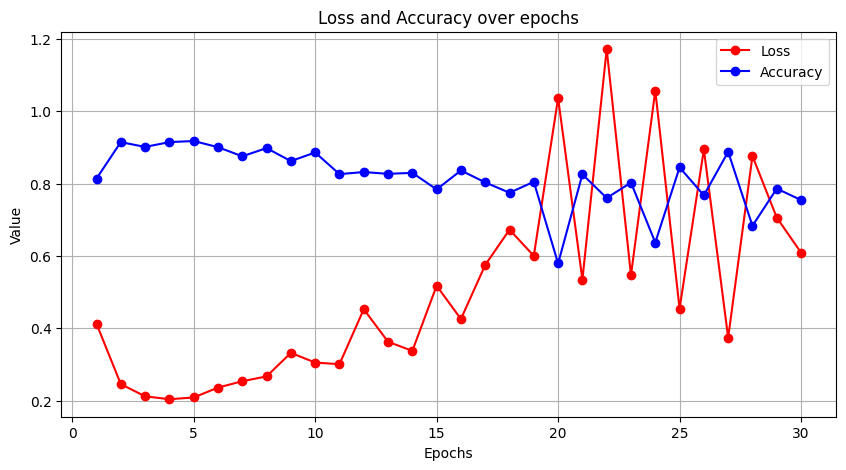

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
epochs = range(1, len(loss_values) + 1)
# График потерь
plt.plot(epochs, loss_values, label='Loss', color='r', marker='o')
# График точности
plt.plot(epochs, accuracy_values, label='Accuracy', color='b', marker='o')

plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()